## 7.2 梯度下降和随机梯度下降

### 7.2.1 一维梯度下降

> 1. **假设连续可导$f: \mathbb{R} \rightarrow \mathbb{R}$输入输出都是标量,给足够小的数$\epsilon$,根据泰勒公式**
$$f(x+\epsilon) \approx f(x) + \epsilon f'(x)$$
**$f'(x)$是函数$f$在$x$的梯度,一维函数的梯度是一个标量,也称导数**

> 2. **给一个常数$\eta > 0$使得$\left|\eta f'(x)\right|$足够小,那么可将$\epsilon$替换为$-\eta f'(x)$得到**
$$f(x - \eta f'(x)) \approx f(x) - \eta f'(x)^2$$
**如果$f'(x) \neq 0$,那么 $\eta f'(x)^2 > 0$,所以**
$$f(x - \eta f'(x)) \lesssim f(x)$$
**此时如果迭代$x$**
$$x \leftarrow x - \eta f'(x)$$
**函数$f(x)$的值可能会降低**

> 3. **所以在梯度下降中,先选取一个初始值$x$和常数$\eta > 0$,然后不断迭代$x$,直到达到某种条件停止;例如$f'(x)^2$的值足够小或者迭代次数达到某个值**

In [1]:
%matplotlib inline
import numpy as np
import torch
import math
import sys
sys.path.append("..") 
import d2lzh_pytorch.utils as d2l

目标函数$f(x) = x^2$,初始值$x=10$,$\eta = 0.2$,迭代10次

In [2]:
def gd(eta):
    x = 10
    results = [x]
    for i in range(10):
        x -= 2 * x * eta
        results.append(x)
    print('epoch 10, x:', x)
    return results

res = gd(0.2)

epoch 10, x: 0.06046617599999997


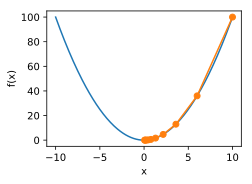

In [7]:
def show_trace(res):
    n = max(abs(min(res)), abs(max(res)), 10)
    f_line = np.arange(-n, n, 0.1)
    d2l.set_figsize()
    d2l.plt.plot(f_line, [x * x for x in f_line])
    d2l.plt.plot(res, [x * x for x in res], '-o')
    d2l.plt.xlabel('x')
    d2l.plt.ylabel('f(x)')
    
show_trace(res)

### 7.2.2 学习率

> 1. **上述$\eta$就是学习率,过小或导致更新缓慢,**
> 2. **如果过大,$\left| \eta f'(x) \right|$过大使上述一阶泰勒公式展开不在成立,此时无法保证迭代$x$会降低$f(x)$**

epoch 10, x: 3.4867844009999995


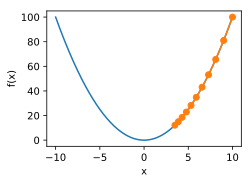

In [8]:
# 使用0.05
show_trace(gd(0.05))

epoch 10, x: 61.917364224000096


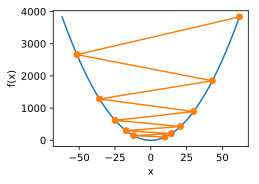

In [9]:
# 使用1.1
show_trace(gd(1.1))

### 7.2.3 多维梯度下降

> 1. **目标输入是向量,输出是标量;假设目标函数$f: \mathbb{R}^d \rightarrow \mathbb{R}$的输入是一个$d$维向量$\boldsymbol{x} = [x_1, x_2, \ldots, x_d]^\top$**
> 2. ****